___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [3]:
import tensorflow as tf

# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [58]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [59]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [60]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [61]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [62]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  88, 221, 215, 217, 219, 211, 185, 150, 118,
        107,  99,  88,  83,  90, 135, 212, 203, 207, 219, 169,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  27, 118, 162,  40,   0,   0,   0,  10,
         19,  28,  39,  47,  36,   0,   0, 203, 230, 220, 203,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 138, 136,  71,  69,  54, 216, 217, 203, 184,
        168, 163, 162, 163, 178, 221, 186,  38,  26,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  67, 134, 154, 224, 129,  66,  81, 117, 129,
        128, 132, 137, 131, 129,  86,  73, 157, 151, 134, 216,  18,   0,
          0,   0],
       [  0,   0,   0,   0, 203, 198, 172, 183, 206, 255, 255, 250, 243,
        240, 239, 235, 238, 244, 255, 238, 184, 160,  86,  98,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 122, 188, 224, 151, 105, 127,  97, 100, 105,
        114, 117, 117, 113, 103,  98, 111, 142, 254, 191, 255,  49,   0,
          0,   0],
       [  0,   0,   0,   0, 163, 179, 200,  95, 154, 198, 197, 200, 200,
        198, 197, 198, 199, 202, 200, 176,  86, 206, 157, 162,  10,   0,
          0,   0],
       [  0,   0,   0,   0, 197, 201, 229,  71, 144, 194, 181, 183, 179,
        182, 180, 179, 180, 190, 185, 197,  76, 219, 185, 201,  34,   0,
          0,   0],
       [  0,   0,   0,   0, 199, 193, 226,  58, 154, 192, 184, 187, 184,
        186, 184, 185, 183, 192, 191, 200,  56, 219, 203, 207,  60,   0,
          0,   0],
       [  0,   0,   0,   0, 201, 194, 224,  41, 163, 190, 186, 186, 184,
        185, 183, 185, 178, 190, 194, 202,  33, 211, 200, 206,  73,   0,
          0,   0],
       [  0,   0,   0,   0, 201, 197, 222,  17, 172, 190, 186, 187, 182,
        186, 185, 187, 180, 187, 193, 202,  26, 212, 202, 203,  76,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 197, 223,   0, 177, 189, 184, 185, 178,
        184, 183, 184, 180, 183, 189, 203,  35, 196, 203, 203,  84,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 197, 223,   0, 185, 187, 185, 187, 180,
        184, 182, 183, 178, 182, 183, 205,  44, 159, 207, 201,  85,   0,
          0,   0],
       [  0,   0,   0,   0, 187, 198, 225,   0, 194, 188, 184, 185, 180,
        183, 183, 184, 181, 181, 177, 206,  46, 129, 211, 200,  88,   0,
          0,   0],
       [  0,   0,   0,   6, 186, 200, 211,   0, 199, 189, 184, 184, 185,
        182, 183, 184, 185, 182, 175, 205,  50,  97, 216, 197,  93,   0,
          0,   0],
       [  0,   0,   0,   5, 185, 204, 184,   0, 202, 188, 182, 182, 183,
        183, 184, 182, 180, 182, 174, 202,  63,  59, 220, 196,  94,   0,
          0,   0],
       [  0,   0,   0,   5, 184, 206, 157,   0, 204, 187, 187, 189, 192,
        190, 190, 191, 190, 187, 183, 202,  78,  35, 222, 197,  95,   0,
          0,   0],
       [  0,   0,   0,   5, 183, 208, 127,   0, 197, 166, 153, 149, 149,
        146, 148, 149, 150, 151, 158, 191,  90,   8, 223, 195,  99,   0,
          0,   0],
       [  0,   0,   0,   6, 184, 208, 11

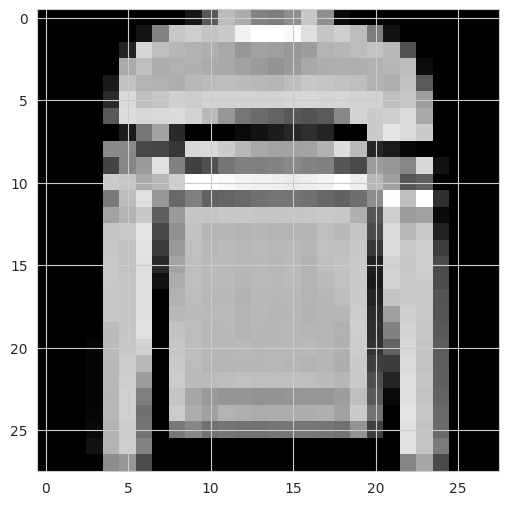

In [64]:
plt.imshow(X_train[5], cmap="gray")
plt.show()

In [15]:
y_train[5]

2

In [16]:
y_train.shape

(60000,)

In [17]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [14]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [19]:
y_train[0]

9

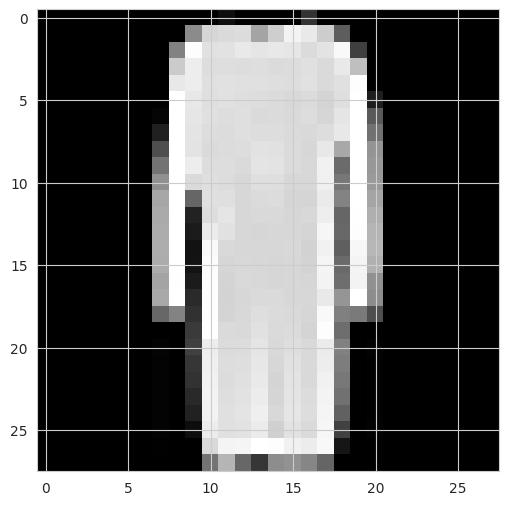

In [53]:
plt.imshow(X_train[25])
plt.show()

In [57]:
classes[y_train[4]]

'T-shirt/top'

<ipython-input-66-e5f834861d34>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rand_index = int(np.random.randint(low=0, high=50000, size=1))


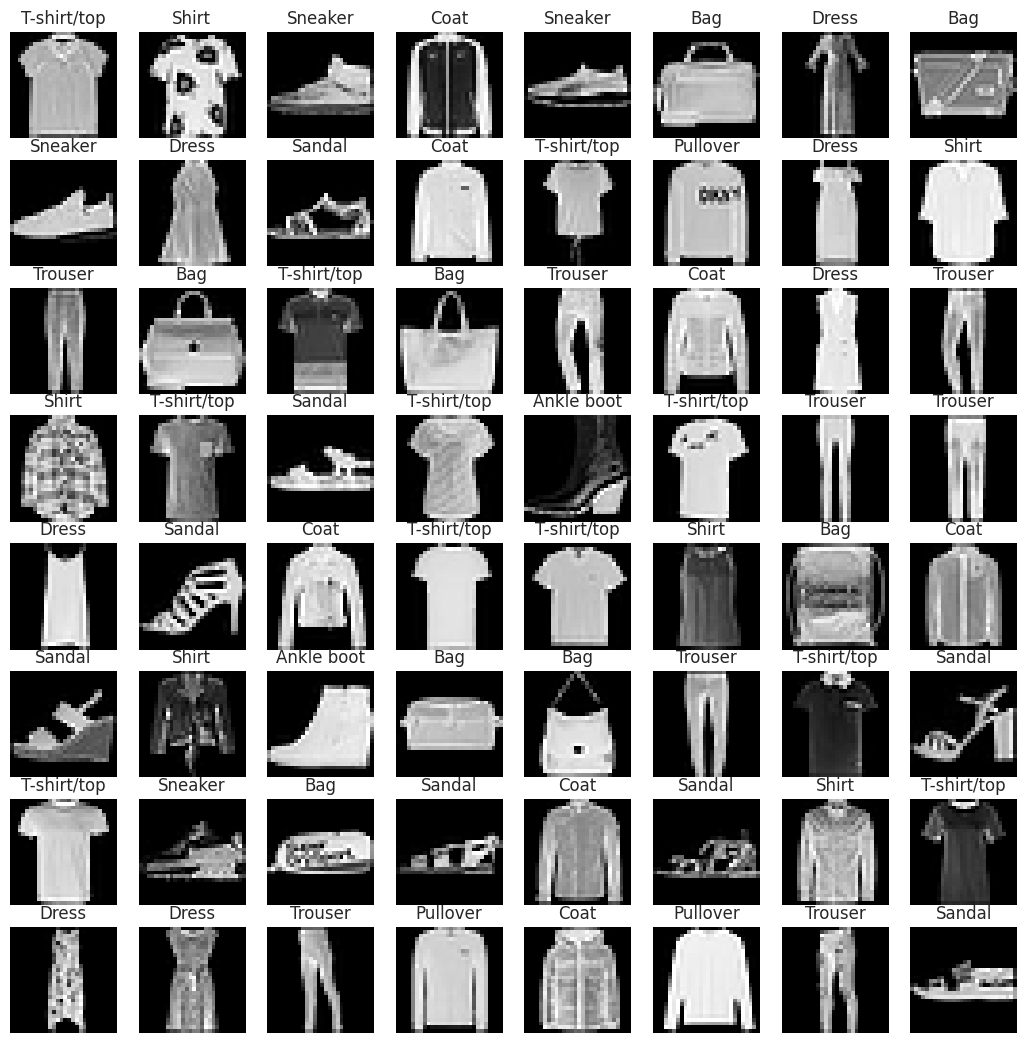

In [66]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(X_train[rand_index], cmap="gray")
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [67]:
X_train[342].min()

0

In [68]:
X_train[9].max()

255

In [69]:
# Normalize image pixels
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [70]:
X_train[9].min()

0.0

In [71]:
X_train[9].max()

1.0

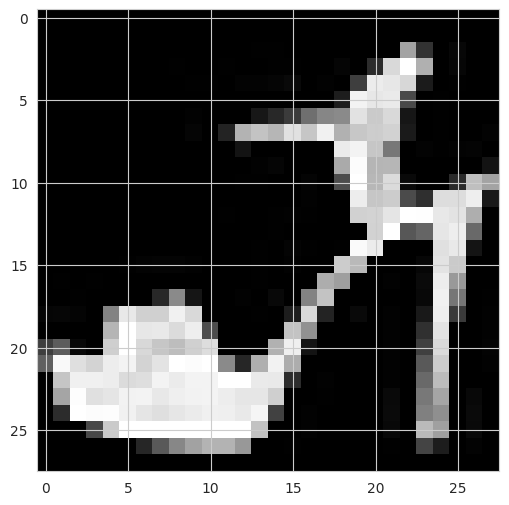

In [72]:
plt.imshow(X_train[9], cmap="gray")
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [73]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [74]:
np.expand_dims(X_train, 3).shape

(60000, 28, 28, 1)

In [75]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [76]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [77]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [78]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [79]:
from tensorflow.keras.utils import to_categorical

In [80]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [81]:
y_train[9]

5

In [84]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [116]:
model = Sequential()

model.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), strides=(1,1), padding='same', activation="relu",)
)
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(
    Conv2D(filters= 56, kernel_size=(3, 3), input_shape=(28, 28, 1), strides=(1,1), padding='same' ,activation="relu")
)
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [117]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 56)        14168     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 7, 7, 56)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 56)          0         
                                                                 
 flatten_3 (Flatten)         (None, 2744)             

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

In [89]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True
)

In [118]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
1875/1875 [==============================] - 84s 44ms/step - loss: 0.4514 - accuracy: 0.8342 - val_loss: 0.3435 - val_accuracy: 0.8746
Epoch 2/20
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3105 - accuracy: 0.8852 - val_loss: 0.3459 - val_accuracy: 0.8728
Epoch 3/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2682 - accuracy: 0.9004 - val_loss: 0.2718 - val_accuracy: 0.8972
Epoch 4/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2387 - accuracy: 0.9109 - val_loss: 0.2526 - val_accuracy: 0.9078
Epoch 5/20
1875/1875 [==============================] - 85s 46ms/step - loss: 0.2211 - accuracy: 0.9172 - val_loss: 0.2453 - val_accuracy: 0.9118
Epoch 6/20
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2030 - accuracy: 0.9234 - val_loss: 0.2343 - val_accuracy: 0.9153
Epoch 7/20
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1887 - accuracy: 0.9287 - val_loss: 0.2439 -

**TASK 7: Plot values of metrics you used in your model.**

In [119]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.451,0.834,0.343,0.875
1,0.310,0.885,0.346,0.873
2,0.268,0.900,0.272,0.897
3,0.239,0.911,0.253,0.908
4,0.221,0.917,0.245,0.912


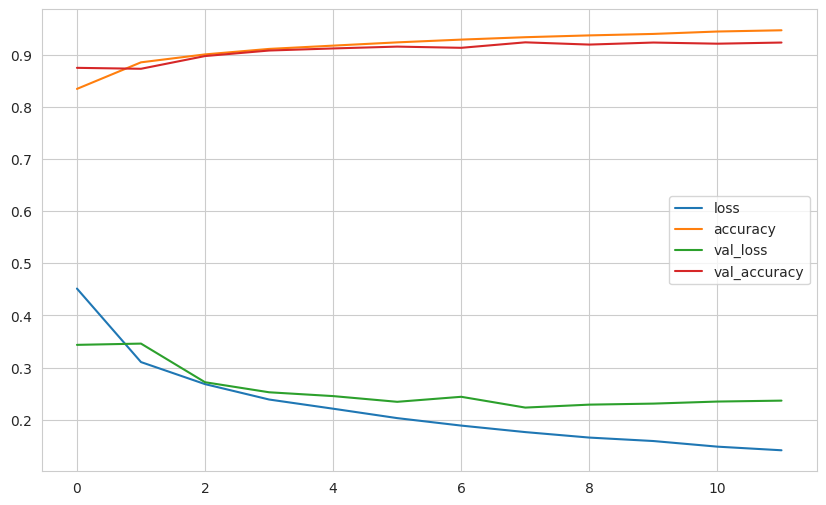

In [120]:
summary.plot();

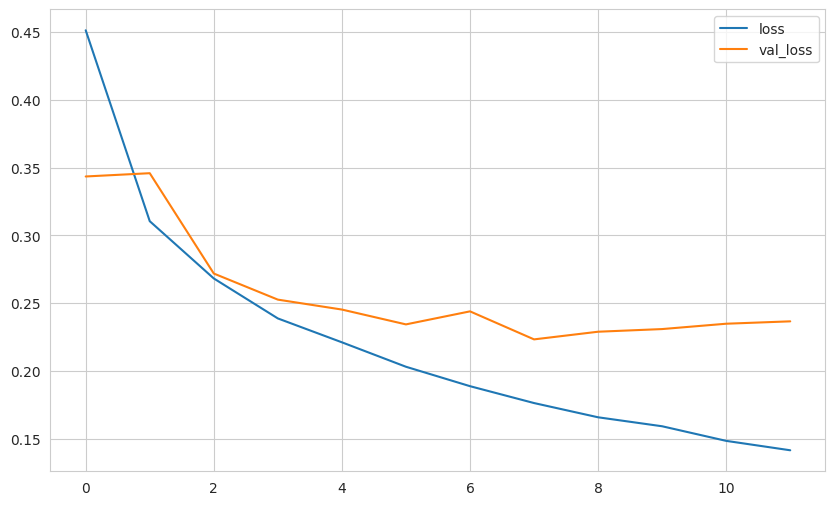

In [121]:
summary[["loss", "val_loss"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [103]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [122]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.2232 - accuracy: 0.9235


[0.22324338555335999, 0.9235000014305115]

In [123]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.22324338555335999
Test accuracy: 0.9235000014305115


In [124]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 5s 17ms/step


array([[2.7799490e-06, 1.4483133e-08, 2.7980366e-07, ..., 1.3123181e-03,
        3.3641938e-06, 9.9711686e-01],
       [2.4573626e-06, 5.2375029e-09, 9.9996370e-01, ..., 1.6747470e-13,
        3.5446917e-08, 5.2016202e-14],
       [1.3964355e-12, 9.9999994e-01, 5.6786486e-15, ..., 3.1360271e-28,
        5.7142559e-18, 2.9357367e-21],
       ...,
       [1.0371957e-10, 1.1108031e-15, 7.7234308e-10, ..., 3.0039606e-11,
        9.9999994e-01, 3.9650311e-15],
       [1.6765345e-06, 9.9999672e-01, 1.0526174e-07, ..., 4.0703440e-18,
        2.9588029e-10, 8.0304266e-14],
       [1.6548827e-05, 2.9375688e-06, 2.5632462e-06, ..., 2.2367612e-02,
        8.6125263e-05, 2.8856454e-04]], dtype=float32)

In [125]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.90      0.88      1000
           3       0.91      0.94      0.93      1000
           4       0.89      0.86      0.88      1000
           5       0.99      0.99      0.99      1000
           6       0.81      0.72      0.77      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [127]:
print(confusion_matrix(y_test, y_pred))

[[909   0  18  14   2   1  50   0   5   1]
 [  0 978   0  16   2   0   4   0   0   0]
 [ 17   1 900   8  36   0  38   0   0   0]
 [ 13   2   6 943  16   0  18   0   2   0]
 [  0   1  58  23 862   0  55   0   1   0]
 [  0   0   0   0   0 986   0  12   0   2]
 [125   2  67  27  48   0 725   0   6   0]
 [  0   0   0   0   0   7   0 982   0  11]
 [  4   0   0   3   3   1   1   1 987   0]
 [  0   0   0   0   0   6   1  30   0 963]]


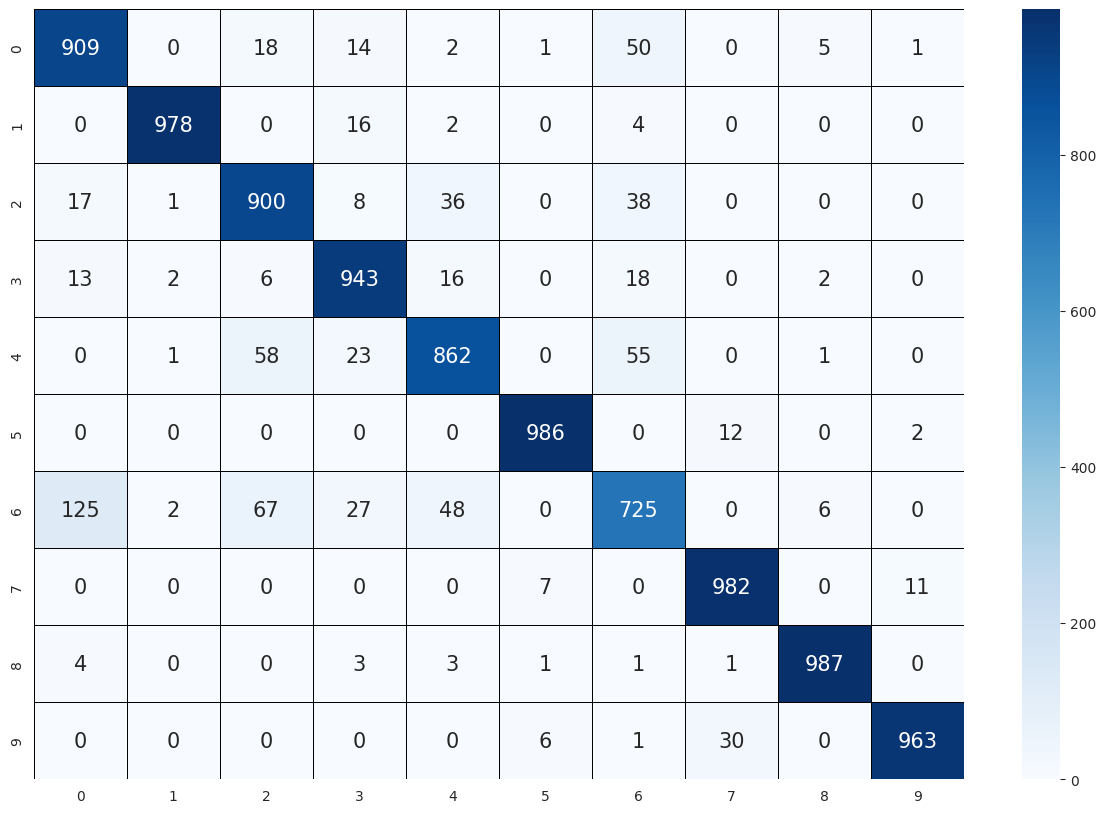

In [128]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [129]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [130]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

765

In [131]:
np.equal(y_test, y_pred).sum()

9235

## Prediction

In [132]:
my_number = X_test[3]

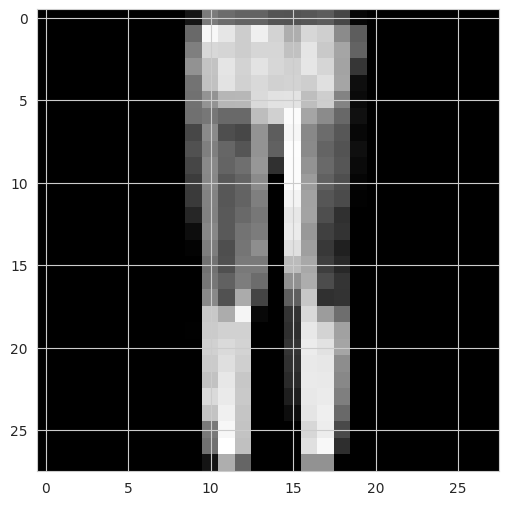

In [133]:
plt.imshow(my_number, cmap="gray")
plt.show()

In [134]:
pred_prob = model.predict(np.expand_dims(my_number, 0))
pred_prob

1/1 [==============================] - 0s 34ms/step


array([[5.8290033e-11, 1.0000000e+00, 2.9843698e-13, 7.4051310e-10,
        2.4929139e-11, 2.7303107e-19, 6.8403425e-12, 1.0550017e-24,
        2.4329927e-15, 3.7688313e-19]], dtype=float32)

In [135]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [136]:
model.save("fashion_class_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [137]:
model = tf.keras.models.load_model("fashion_class_model.h5")

In [142]:
classes[int(y_pred)]

'Trouser'

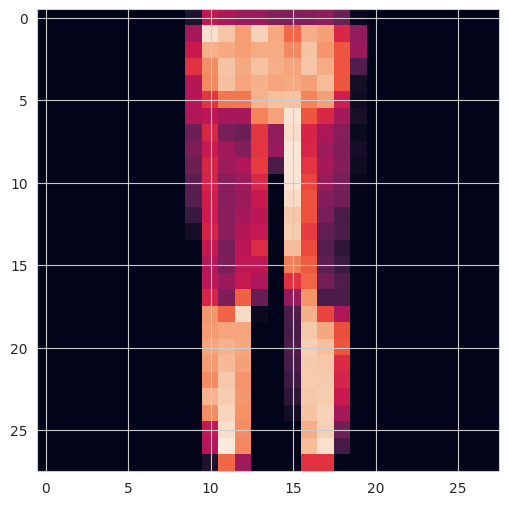

In [141]:
plt.imshow(X_test[3])
plt.show()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___